# Explore here

In [41]:
# Your code here
import pandas as pd
import numpy as np
import regex as re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

import warnings

In [9]:
# Get data
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv")
df

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True
...,...,...
2994,https://www.smartcitiesworld.net/news/news/dee...,False
2995,https://www.youtube.com/watch,True
2996,https://techcrunch.com/2019/07/04/an-optimisti...,False
2997,https://www.technologyreview.com/2019/12/20/13...,False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      2999 non-null   object
 1   is_spam  2999 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 26.5+ KB


In [11]:
df.duplicated().sum()

np.int64(630)

In [12]:
df[df.duplicated(keep=False)]


,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
4,https://briefingday.com/fan,True
22,https://www.technologyreview.com/innovators-un...,False
...,...,...
2971,https://www.cnbc.com/2020/06/29/stock-market-f...,False
2972,https://thehustle.co/account/,True
2973,https://thehustle.co/,True
2979,https://www.bloomberg.com/tosv2.html,True


In [16]:
df_sin_duplicados = df.drop_duplicates()
df_sin_duplicados

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True
...,...,...
2993,https://www.theverge.com/2020/6/29/21306889/di...,False
2994,https://www.smartcitiesworld.net/news/news/dee...,False
2996,https://techcrunch.com/2019/07/04/an-optimisti...,False
2997,https://www.technologyreview.com/2019/12/20/13...,False


In [17]:
print('Se ha eliminado el',(len(df_sin_duplicados) / len(df) -1) *100,'%','del dataset') 


Se ha eliminado el -21.00700233411137 % del dataset


In [18]:
df['is_spam'].value_counts()

is_spam
False    2303
True      696
Name: count, dtype: int64

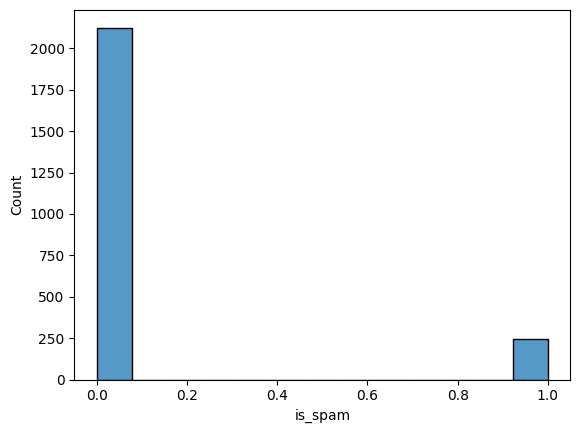

In [27]:
sns.histplot(data = df_sin_duplicados, x = "is_spam")
plt.show()

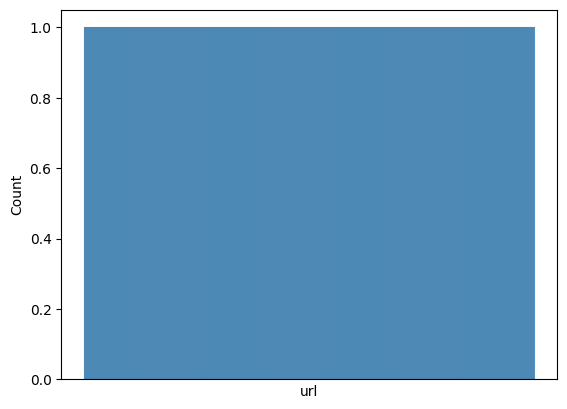

In [25]:
sns.histplot(data = df_sin_duplicados, x = "url").set_xticks([])
plt.show()

In [30]:
# 2. Separar características y etiquetas
X = df['url']
y = df['is_spam']


In [ ]:
# 3. Vectorizar URLs (usamos n-gramas de caracteres porque las URLs no son lenguaje natural)
vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(3, 5)) 
X_vectorized = vectorizer.fit_transform(X)

### Notas
- El parámetro analyzer='char_wb' hace que se enfoquen en caracteres en lugar de palabras (más útil para URLs).
- ngram_range=(3, 5) crea grupos de 3 a 5 caracteres para capturar patrones comunes en URLs.

In [32]:
# 4. Separar entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


In [33]:
# 5. Crear y entrenar el modelo SVC
model = SVC(kernel='linear')  # Puedes probar con 'rbf' también
model.fit(X_train, y_train)


SVC(kernel='linear')

In [38]:
# 5. Crear y entrenar el modelo SVC
model_rbf = SVC(kernel='rbf')  # Puedes probar con 'rbf' también
model_rbf.fit(X_train, y_train)

SVC()

In [39]:
# 6. Hacer predicciones
y_pred = model.predict(X_test)
y_pred_rbf = model_rbf.predict(X_test)


In [37]:
# 7. Evaluar el modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98       455
        True       0.96      0.90      0.93       145

    accuracy                           0.97       600
   macro avg       0.97      0.94      0.95       600
weighted avg       0.97      0.97      0.97       600



In [40]:
# 7. Evaluar el modelo
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

       False       0.96      0.99      0.98       455
        True       0.98      0.87      0.92       145

    accuracy                           0.96       600
   macro avg       0.97      0.93      0.95       600
weighted avg       0.96      0.96      0.96       600



In [43]:
svc = SVC()

# Definir el espacio de búsqueda
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    cv=5,  # validación cruzada de 5 particiones
    scoring='accuracy',
    verbose=2,
    n_jobs=-1  # Usa todos los núcleos disponibles
)

In [44]:
# Entrenar con el dataset vectorizado
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   2.9s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   3.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   3.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   2.8s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   3.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   4.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   4.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   4.5s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   4.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   4.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   5.7s
[CV] END ....................C=0.1, gamma=scale,

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [45]:
# Mostrar mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [46]:
# Usar el mejor modelo encontrado para predecir
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


In [47]:
# Evaluar
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.98       455
        True       0.94      0.91      0.93       145

    accuracy                           0.96       600
   macro avg       0.96      0.95      0.95       600
weighted avg       0.96      0.96      0.96       600

